In [31]:
#Import Lib&package
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout  # for regularization
from keras import regularizers


In [35]:
# Initalising The CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(filters = 64, kernel_size = [3, 3], padding = 'same', input_shape = (80, 80, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Improve Model by add Convo + Pooling
classifier.add(Conv2D(filters = 32, kernel_size = [3, 3], padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

#Improve Model by add Convo + Pooling
classifier.add(Conv2D(filters = 32, kernel_size = [3, 3], padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

# Step 3 - Flatterning
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.05)))
#classifier.add(Dropout(rate = 0.05))
classifier.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.05)))
#classifier.add(Dropout(rate = 0.05))
classifier.add(Dense(6, activation = 'softmax'))  #2 class====> sigmoid, if > 2 class ==> use softmax

# Compiling The CNN
from keras.optimizers import Adam
opt = Adam(lr=0.002)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
#Part 2 - Fitting the CNN to the images 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,            #recalse from 0-255 to 0-1
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#train_set
training_set = train_datagen.flow_from_directory('D:/work/Machine Learning/assignment_fail/intel-image-classification/seg_train/seg_train',
                                                target_size=(80, 80),
                                                batch_size=32,
                                                class_mode='categorical')
#test_set
test_set = test_datagen.flow_from_directory('D:/work/Machine Learning/assignment_fail/intel-image-classification/seg_test/seg_test',
                                            target_size=(80, 80),
                                            batch_size=32,
                                            class_mode='categorical')

Found 13991 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [37]:
classifier.fit_generator(training_set,
                        steps_per_epoch=13991,       #number of training set
                        epochs=7,
                        validation_data=test_set,
                        validation_steps=3000)       #number of validation set

Epoch 1/7
13991/13991 [==============================] - 2073s 148ms/step - loss: 0.7750 - acc: 0.7563 - val_loss: 0.6163 - val_acc: 0.8124
Epoch 2/7
13991/13991 [==============================] - 2711s 194ms/step - loss: 0.5843 - acc: 0.8246 - val_loss: 0.5321 - val_acc: 0.8477 - loss: 0.5844 -  - ETA: 4s - los - ETA: 0s - loss: 0.5843 - acc: 0.
Epoch 3/7
13991/13991 [==============================] - 2382s 170ms/step - loss: 0.5439 - acc: 0.8393 - val_loss: 0.5293 - val_acc: 0.8474
Epoch 4/7
13991/13991 [==============================] - 2209s 158ms/step - loss: 0.5208 - acc: 0.8480 - val_loss: 0.6199 - val_acc: 0.8240
Epoch 5/7
13991/13991 [==============================] - 2221s 159ms/step - loss: 0.5063 - acc: 0.8530 - val_loss: 0.5406 - val_acc: 0.8465
Epoch 6/7
13991/13991 [==============================] - 2117s 151ms/step - loss: 0.4938 - acc: 0.8577 - val_loss: 0.5313 - val_acc: 0.8453
Epoch 7/7
13991/13991 [==============================] - 2106s 151ms/step - loss: 0.4840 - 

In [38]:
#save model
# serialize model to JSON
model_json = classifier.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# #Home WOrk wingle prediction
# import numpy as np
# from keras.preprocessing import image
# #test_image = image.load_img('dataeet/single_prediction/*')
# test_image = image.load_img('dataeet/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)

# result = classifier.predict(test_image)
# training_set.class_indices
# if result[0][0] == 1 :
#     prediction = 'dog'
# else:
#     prediction = 'cat'

In [39]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 40, 40, 32)        18464     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3200)              0         
__________

In [116]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [47]:
result = classifier.predict(test_image)

In [48]:
result

array([[1.8332084e-15, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [158]:
import os
PRED_DIR = 'D:/work/Machine Learning/assignment_fail/intel-image-classification/seg_pred/seg_pred/'
images = []
imagesv = []
for img_name in os.listdir(PRED_DIR):
    img = image.load_img(PRED_DIR + img_name, target_size = (80, 80))
    imagesv.append(img)
    images.append(image.img_to_array(img))
images_test = np.array(images)

In [185]:
pred_vis = imagesv[980:1000]
pred_test = images_test[980:1000]

In [186]:
results = classifier.predict(pred_test)

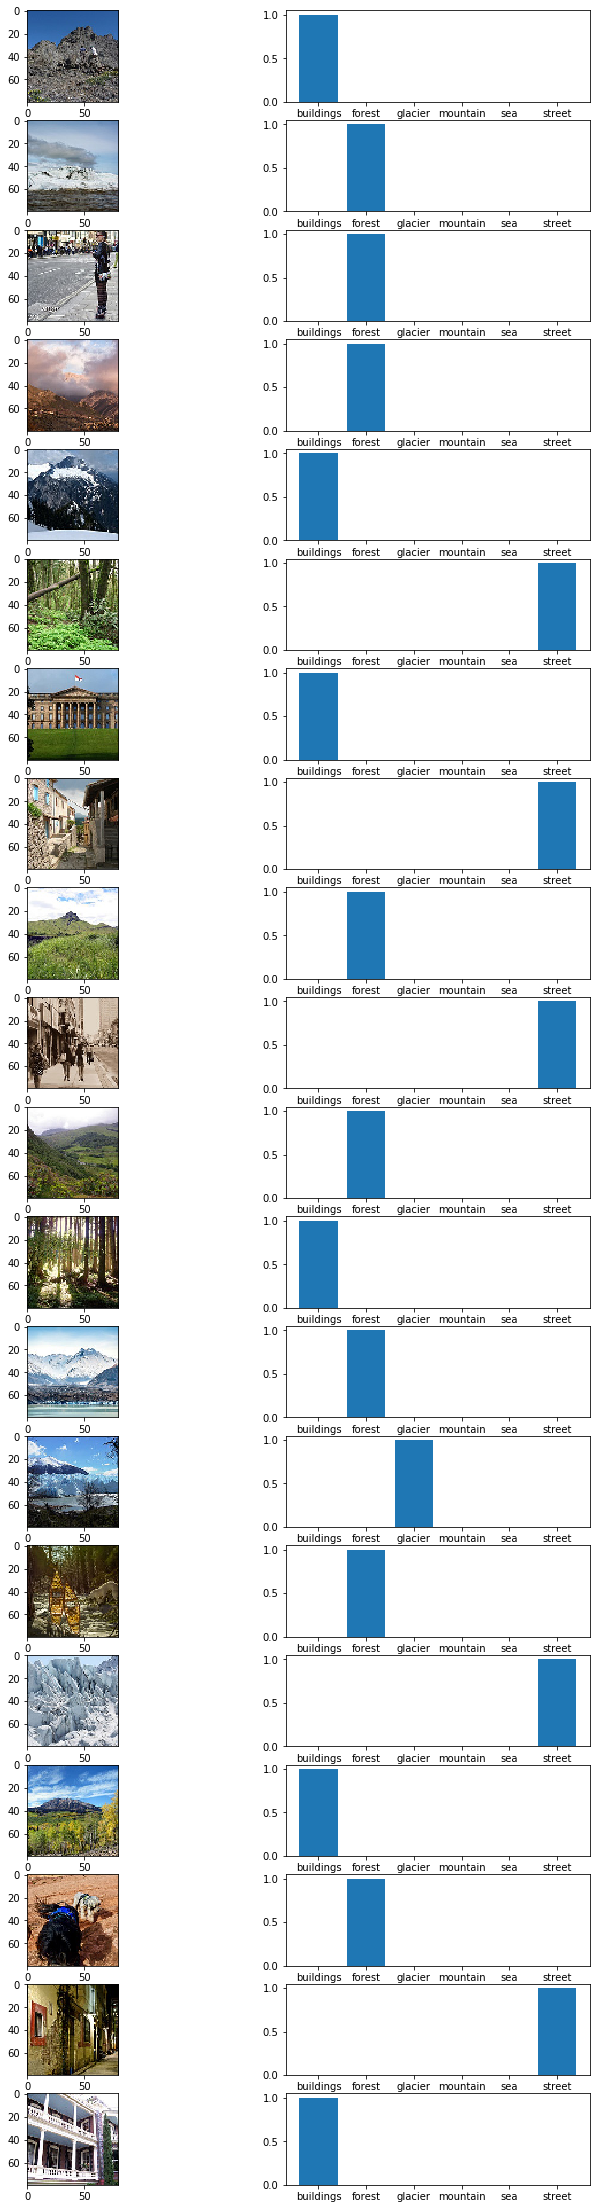

In [187]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (12,len(pred_vis)*2))
for idx,img in enumerate(pred_vis):
    ax = fig.add_subplot(len(pred_vis),2,2*idx+1)
    plt.imshow(img)
    ax = fig.add_subplot(len(pred_vis),2,2*idx+2)
    ax.bar(list(training_set.class_indices),results[idx])
plt.show()